Todos
- discuss how a neural network learns
- loss function
- optiimzer
- stochastic gradient descent
- learning rate, epoch and batch size
- Adam

In [11]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

model = keras.Sequential([
    layers.Dense(512, input_shape=[11]),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.Dense(1)
])

In [12]:
model.compile(
    optimizer="adam",
    loss="mae"
)

In [13]:
df = pd.read_csv('datasets/winequality-red.csv')

In [14]:
df.iloc[:, :-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
X = df.iloc[:, :-1]
y = list(df.quality)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [25]:
history = model.fit(
    np.array(X_train), np.array(y_train),
    validation_data=(np.array(X_valid), np.array(y_valid)),
    batch_size=128,
    epochs=100,
)

Epoch 1/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4602 - val_loss: 0.5222
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4603 - val_loss: 0.5984
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4790 - val_loss: 0.5332
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4667 - val_loss: 0.5809
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4743 - val_loss: 0.5116
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4590 - val_loss: 0.6390
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4796 - val_loss: 0.5186
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4528 - val_loss: 0.5255
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4812 - val_loss: 0.5208
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4712 - val_loss: 0.5508
Epoch 11

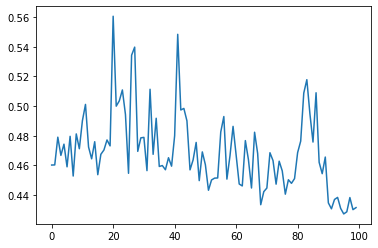

In [26]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();